<a href="https://colab.research.google.com/github/wonwooddo/My_python_cheatsheet/blob/master/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

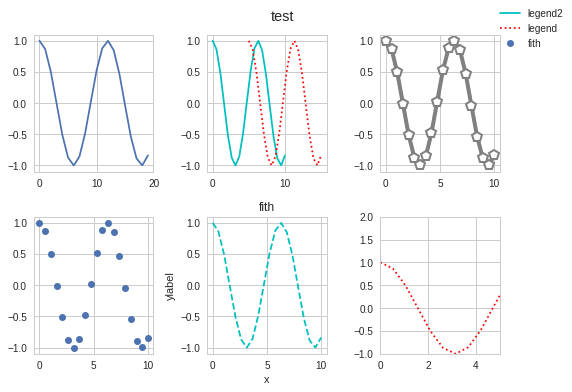

In [2]:
x=np.linspace(0, 10, 20)
y=np.cos(x)

fig, ax = plt.subplots(2, 3)
fig.suptitle('test')
ax[0, 0].plot(y)
ax[0, 1].plot(x, y, '-c', label="legend2")
ax[0, 1].plot(x+5, y, ':r', label="legend")
ax[0, 2].plot(x, y, '-p', color='gray', markersize=10, linewidth=4, markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)

ax[1, 0].plot(x, y, 'o', label='fith')
ax[1, 1].plot(x, y, '--c'); ax[1, 1].set(xlabel="x", ylabel="ylabel", title="fith")
ax[1, 2].plot(x, y, ':r') ; ax[1, 2].set(xlim=(0, 5), ylim=(-1, 2))
fig.tight_layout(rect=[0, 0, 0.9, 0.95])
fig.legend(loc=1)
plt.show()

## 각 점의 속성(크기, 표면 색상, 테두리 색상 등)을 개별적으로 제어하거나 데이터에 매핑할때 plt.scatter 사용

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0,0.5,u'Y')

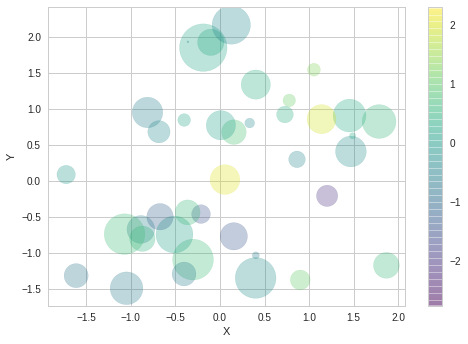

In [3]:
rng=np.random.RandomState(0)
x=rng.randn(100)
y=rng.randn(100)
colors=rng.randn(100)
sizes=1000 * rng.randn(100) 

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")


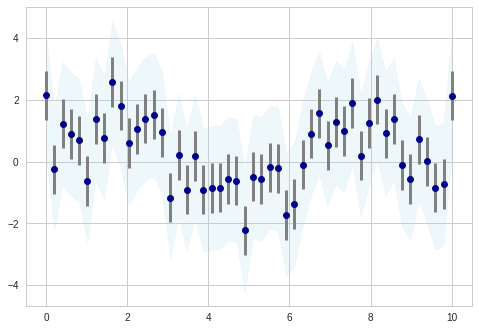

In [4]:
dy=0.8
x=np.linspace(0, 10, 50)
y=np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='darkblue', ecolor='gray', elinewidth=3)
plt.fill_between(x, y-2, y+2, color='lightblue', alpha=0.2)

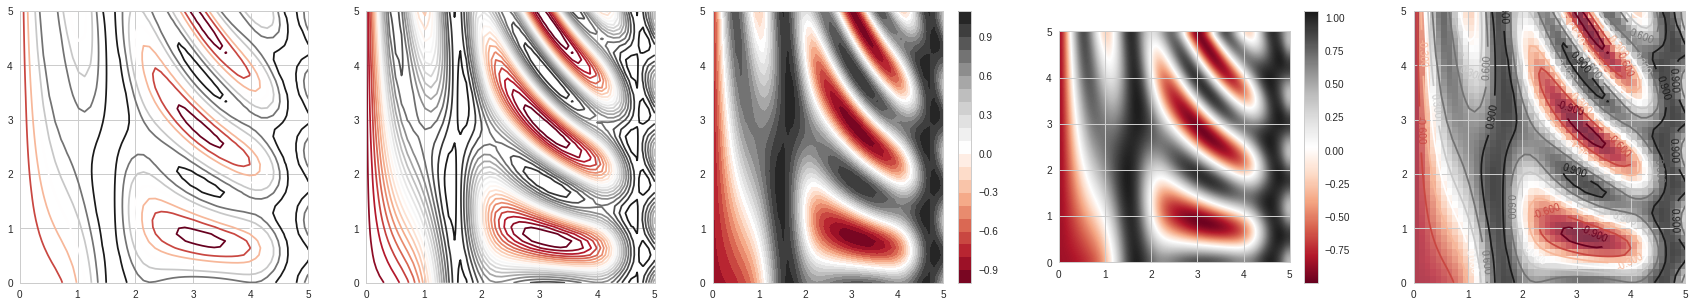

In [34]:
def f(x, y):
  return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x=np.linspace(0, 5, 50)
y=np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig, ax = plt.subplots(1, 5, figsize=(30,5))

ax[0].contour(X, Y, Z, cmap='RdGy') 

img1=ax[1].contour(X, Y, Z, 20, cmap='RdGy')


img2=ax[2].contourf(X, Y, Z, 20, cmap='RdGy')

img3=ax[3].imshow(Z, extent=[0, 5, 0, 5], cmap='RdGy', origin='lower', interpolation='bicubic')


img4=ax[4].contour(X, Y, Z, cmap='RdGy')
ax[4].clabel(img4, inline=True, fontsize=10)
ax[4].imshow(Z, cmap='RdGy', extent=[0, 5, 0, 5], origin='lower' ,alpha=0.8)

plt.colorbar(img2, ax=ax[2])
plt.colorbar(img3, ax=ax[3])

plt.show()


(array([0.00434962, 0.        , 0.00434962, 0.00434962, 0.01739848,
        0.0217481 , 0.03479696, 0.0652443 , 0.08699241, 0.16963519,
        0.16963519, 0.24357874, 0.30447342, 0.33927038, 0.33927038,
        0.42191317, 0.35231925, 0.36971773, 0.34796962, 0.33492076,
        0.20878177, 0.18703367, 0.11309013, 0.09134203, 0.02609772,
        0.03914658, 0.03044734, 0.00869924, 0.00869924, 0.00434962]),
 array([-3.63399281, -3.40408769, -3.17418256, -2.94427744, -2.71437232,
        -2.48446719, -2.25456207, -2.02465694, -1.79475182, -1.56484669,
        -1.33494157, -1.10503644, -0.87513132, -0.64522619, -0.41532107,
        -0.18541594,  0.04448918,  0.27439431,  0.50429943,  0.73420456,
         0.96410968,  1.19401481,  1.42391993,  1.65382506,  1.88373018,
         2.11363531,  2.34354043,  2.57344556,  2.80335068,  3.03325581,
         3.26316093]),
 <a list of 30 Patch objects>)

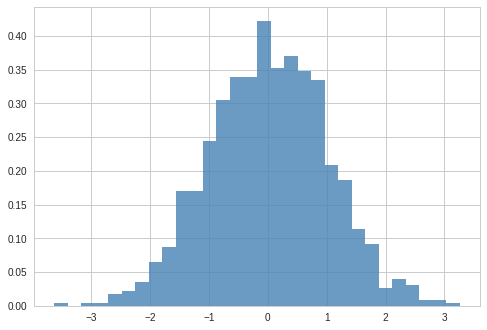

In [43]:
data=np.random.randn(1000)

plt.hist(data, bins=30, normed=True, alpha=0.8, color='steelblue', edgecolor='none')

In [0]:
,